In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.utils import np_utils
#from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data = []
labels = []

for folder in os.listdir('/content/drive/My Drive/New folder'):
  img_dir = os.path.join('/content/drive/My Drive/New folder',folder)
  
  for img in os.listdir(img_dir):
    image = cv2.imread(os.path.join(img_dir,img))
    image = cv2.resize(image, (299,299))

    data.append(image)
    labels.append(folder)
  

In [0]:
data = np.array(data, dtype="float") / 255.0
le = LabelEncoder()
labels = le.fit_transform(labels)
labels = np_utils.to_categorical(labels, 8)

In [0]:
(trainX, testX, trainY, testY) = train_test_split(data, 
                                                  labels,
                                                  stratify=labels,
	                                                test_size=0.25,
                                                  shuffle = True,
                                                  random_state=42)


In [0]:
valy = testY[0:11]
valx = testX[0:11]
testX = testX[11:]
testY = testY[11:]

In [10]:
from keras.applications import InceptionV3
conv_base = InceptionV3(weights='imagenet',
                 include_top = False,
                 input_shape = (299, 299, 3))

87916544/87910968 [==============================] - 1s 0us/step


In [0]:
from keras.models import Sequential, Model, load_model
from keras import applications
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD

In [0]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(rate=1- 0.8))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(rate = 1-0.8))
model.add(layers.Dense(8, activation = 'sigmoid'))

In [0]:
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
BS = 8
EPOCHS = 50
aug = ImageDataGenerator()
aug = ImageDataGenerator(   horizontal_flip = True,
                              rotation_range=45,
                              width_shift_range= 0.15,
                              height_shift_range= 0.15,
                              zoom_range = 0.5)

In [0]:
checkpointer = ModelCheckpoint(filepath='model4.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1, save_best_only=True)


In [17]:
H = model.fit_generator(
	aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY),
	steps_per_epoch=len(trainX) // BS,
  callbacks = [ModelCheckpoint(filepath='model4.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1, save_best_only=True)],
	epochs=EPOCHS)

Epoch 1/50
84/84 [==============================] - 669s 8s/step - loss: 2.1310 - accuracy: 0.1416 - val_loss: 2.0471 - val_accuracy: 0.2222

Epoch 00001: val_loss improved from inf to 2.04713, saving model to model4.01-2.05.hdf5


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


Epoch 2/50
84/84 [==============================] - 657s 8s/step - loss: 2.0473 - accuracy: 0.2116 - val_loss: 1.9600 - val_accuracy: 0.2315

Epoch 00002: val_loss improved from 2.04713 to 1.95996, saving model to model4.02-1.96.hdf5
Epoch 3/50
84/84 [==============================] - 655s 8s/step - loss: 1.9616 - accuracy: 0.2563 - val_loss: 1.8777 - val_accuracy: 0.3056

Epoch 00003: val_loss improved from 1.95996 to 1.87765, saving model to model4.03-1.88.hdf5
Epoch 4/50
84/84 [==============================] - 661s 8s/step - loss: 1.8561 - accuracy: 0.3264 - val_loss: 1.7248 - val_accuracy: 0.4259

Epoch 00004: val_loss improved from 1.87765 to 1.72483, saving model to model4.04-1.72.hdf5
Epoch 5/50
84/84 [==============================] - 660s 8s/step - loss: 1.7469 - accuracy: 0.3532 - val_loss: 1.6108 - val_accuracy: 0.4352

Epoch 00005: val_loss improved from 1.72483 to 1.61080, saving model to model4.05-1.61.hdf5
Epoch 6/50
84/84 [==============================] - 655s 8s/step

[INFO] evaluating network...
                   precision    recall  f1-score   support

baingan_ka_bharta       0.88      0.78      0.82        27
    bhindi_bharwa       0.93      1.00      0.96        25
    gravy_chicken       0.85      0.90      0.88        31
 kala_chana_sabji       0.79      0.97      0.87        31
maggi_street_food       0.91      0.88      0.89        24
       matar_aloo       0.92      0.76      0.83        29
            pasta       0.95      1.00      0.98        21
 tandoori_chicken       0.96      0.86      0.91        28

         accuracy                           0.89       216
        macro avg       0.90      0.89      0.89       216
     weighted avg       0.89      0.89      0.89       216



NameError: ignored

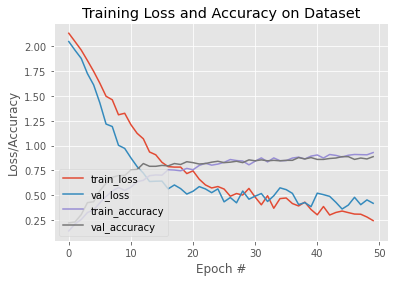

In [18]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=BS)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=le.classes_))
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_accuracy")
plt.plot(N, H.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(args["plot"])

In [0]:
preds = model.predict(valx)

In [0]:
model.save_weights('my_model_weights.h5')